## Geospatial Datacamp

In this exercise, we will start with exploring a dataset about the restaurants in the center of Paris (compiled from a Paris Data open dataset, here https://opendata.paris.fr/explore/dataset/commercesparis/). The data contains the coordinates of the point locations of the restaurants and a description of the type of restaurant.

link to the direct download: https://opendata.paris.fr/explore/dataset/restaurants-casvp/export/?disjunctive.code&disjunctive.nom_restaurant&disjunctive.type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# %matplotlib inline

# import contextily as ctx
# import geopandas as gpd
# import rasterio as rio
# import numpy as np
# import matplotlib.pyplot as plt

# # Data
# from pysal.lib.examples import get_path

In [249]:
os.chdir(r"C:/Users/Daniele/Downloads/Paris")

In [250]:
# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")
#restaurants = pd.read_csv("restaurants-casvp.csv", sep=";")

# Import contextily
import contextily 

restaurants.info() #check NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 3 columns):
type    5735 non-null object
x       5735 non-null float64
y       5735 non-null float64
dtypes: float64(2), object(1)
memory usage: 134.5+ KB


In [5]:
restaurants.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


In [58]:
# split the "tt" col into x and y locations (needed for the other dataset)
# restaurants['x'], restaurants['y'] = restaurants['tt'].str.split(',',1).str

In [64]:
# # transform x,y into "float"
# restaurants['x'] = restaurants.x.astype(float)
# restaurants['y'] = restaurants.y.astype(float)
# restaurants.info() #check vars

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 42
Data columns (total 8 columns):
code               42 non-null int64
Nom restaurant     42 non-null object
adresse            42 non-null object
ville              42 non-null object
tt                 42 non-null object
TYPE               42 non-null object
x                  42 non-null float64
y                  42 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.2+ KB


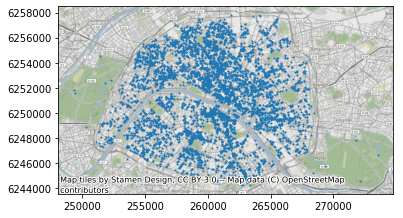

In [251]:
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

      species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)


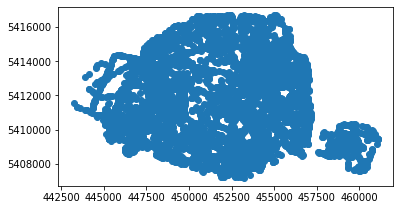

In [252]:
# Import GeoPandas
import geopandas

# Read the Paris districts dataset
districts = geopandas.read_file('paris_trees_small.gpkg')

# Inspect the first rows
print(districts.head(5))

# Make a quick visualization of the districts
districts.plot()
plt.show()

A GeoDataFrame represents a tabular, geospatial vector dataset:
- a 'geometry' column: that holds the geometry information
- other columns: attributes describe each of the geometries

In [8]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts.geometry))

# Inspect the first rows of the geometry
print(districts.geometry.head())

# Inspect the area of the districts
print(districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POINT (455834.122 5410780.606)
1    POINT (446546.284 5412574.697)
2    POINT (449768.283 5409876.557)
3    POINT (451779.708 5409292.071)
4    POINT (447041.361 5409756.712)
Name: geometry, dtype: geometry
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
7826    0.0
7827    0.0
7828    0.0
7829    0.0
7830    0.0
7831    0.0
7832    0.0
7833    0.0
7834    0.0
7835    0.0
7836    0.0
7837    0.0
7838    0.0
7839    0.0
7840    0.0
7841    0.0
7842    0.0
7843    0.0
7844    0.0
7845    0.0
7846    0.0
7847    0.0
7848    0.0
7849    0.0
7850    0.0
7851    0.0
7852    0.0
7853  

In [9]:
# Convert paris_rest to a GeoDataFrame
# we want to convert the pandas DataFrame to a GeoDataFrame. This can be done with the GeoDataFrame() constructor and the geopandas.points_from_xy() function

restaurants = geopandas.GeoDataFrame(restaurants, geometry=geopandas.points_from_xy(restaurants.x, restaurants.y))

In [10]:
#inspect the first rows of this new GeoDF
print(restaurants.head())

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


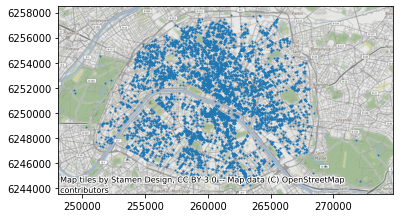

In [11]:
# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

We have the same plot as we constructed before with the normal df.
(Here, we did not specify the x and y coordinates).

In [12]:
print(districts.head())
#I NEED THE POPULATION VAR + need to aggregate per "district"
# # Inspect the first rows of the districts dataset
# print(districts.head())

# # Inspect the area of the districts
# print(districts.geometry.area)

# # Add a population density column
# districts['population_density'] =  districts.population/ districts.geometry.area * 10**6

# # Make a plot of the districts colored by the population density
# districts.plot(districts.population_density, legend=True)
# plt.show()

      species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)


In [13]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


In [14]:
# using value_counts instead of groupby
restaurants['type'].value_counts()

Traditional French restaurant            1945
Asian restaurant                         1642
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
African restaurant                        138
Other world restaurant                    107
Central and South American restuarant      97
Caribbean restaurant                       27
Name: type, dtype: int64

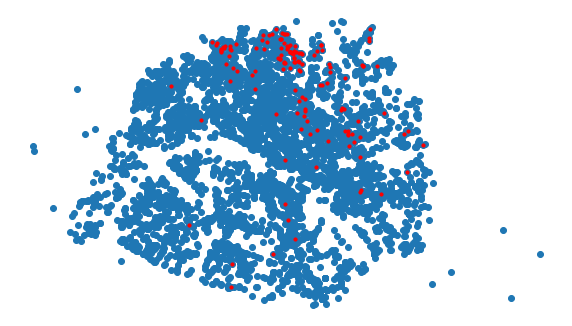

In [15]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type']=='African restaurant']

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax)
african_restaurants.plot(ax=ax,color='red', markersize=10)
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

The majority of African rests are located in the north/north-eastern part of Paris.

In [16]:
# Let's introduce and import Point to create shapely geometries and see spatial relationships
from shapely.geometry import Point

In [17]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto)) #in meters

False
False
4431.459825586486


In [18]:
# Filter by spatial relationships
# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])  #we don't return any district containing eiffel_tower (fix the dataset)
#we need the "districts_bike" dataset (that we will import afterwards)

0    False
1    False
2    False
3    False
4    False
dtype: bool
Empty GeoDataFrame
Columns: [species, location_type, geometry]
Index: []


460.69760282781715


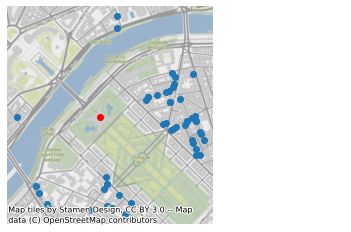

In [19]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel < 1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [ ]:
# Spatial Join: transferring attrivutes from one layer to another based on their relationships (same methods as the "classic join")

In [20]:
stations_bike = geopandas.read_file("paris_sharing_bike_stations_utm.geojson") #read bike stations in Paris
districts_bike = geopandas.read_file("paris_districts_utm.geojson") #read districts (80 districts in Paris)

In [21]:
districts_bike #check "new" district GeoDataFrame

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5..."
6,7,Mail,5783,"POLYGON ((452097.193 5412644.279, 452084.774 5..."
7,8,Bonne-Nouvelle,9595,"POLYGON ((452439.958 5412587.532, 452397.232 5..."
8,9,Arts-et-Metiers,9560,"POLYGON ((453078.109 5412667.110, 453044.807 5..."
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5..."


In [22]:
# Use the geopandas.sjoin() function to add the district name in which each station is located to the stations
#
joined = geopandas.sjoin(stations_bike, districts_bike, op='within')
joined.head(5)

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population
0,14002 - RASPAIL QUINET,44,4,POINT (450804.449 5409797.268),52,53,Montparnasse,18570
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (451419.447 5409421.529),52,53,Montparnasse,18570
293,14033 - DAGUERRE GASSENDI,38,1,POINT (450708.228 5409406.941),52,53,Montparnasse,18570
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (451340.026 5409124.575),52,53,Montparnasse,18570
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (451274.511 5409609.731),52,53,Montparnasse,18570


In [23]:
# Calculate the number of bike_stations in each district
stations_by_district = joined.groupby('district_name').size()

# Convert the series to a DataFrame and specify column name
stations_by_district = stations_by_district.to_frame(name='n_stations')

# Inspect the result
print(stations_by_district.head())

                 n_stations
district_name              
Amérique                 17
Archives                  4
Arsenal                   7
Arts-et-Metiers           4
Auteuil                  21


We can make the map of the districts colored by the tree density.
We first need to merge the number of stations in each district we calculated before, back to the district dataset.
We will use "pd.merge" function to join 2 DF based on a common column.
However, since not all districts have the same size, it is a fairer comparison to visualise the station-density (= # of stations relative to each area).

In [24]:
# we can make the map of the districts colored by the station density.
districts_stations = pd.merge(districts_bike, stations_by_district, on='district_name')

In [25]:
districts_stations #check DF with 80 rows (80 districts in paris + col "n_stations") 

,id,district_name,population,geometry,n_stations
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",4
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",13
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",6
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",5
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",4
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",7
6,7,Mail,5783,"POLYGON ((452097.193 5412644.279, 452084.774 5...",7
7,8,Bonne-Nouvelle,9595,"POLYGON ((452439.958 5412587.532, 452397.232 5...",6
8,9,Arts-et-Metiers,9560,"POLYGON ((453078.109 5412667.110, 453044.807 5...",4
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",3


In [26]:
# Add a column with the stations density
districts_stations['n_stations_per_area'] = districts_stations['n_stations'] / districts_stations.geometry.area

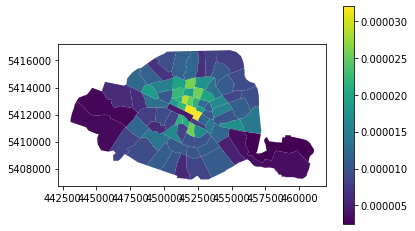

In [27]:
# pip install descartes
import descartes

# Make of map of the districts colored by 'n_stations_per_area
districts_stations.plot(column = 'n_stations_per_area' , legend=True)
plt.show() #a chroroplet plot!

C:\Users\Daniele\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Daniele\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


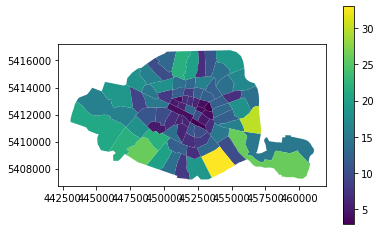

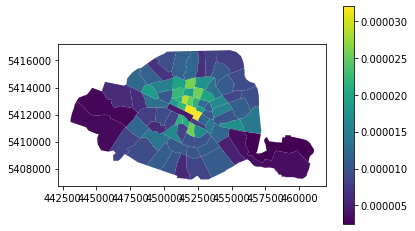

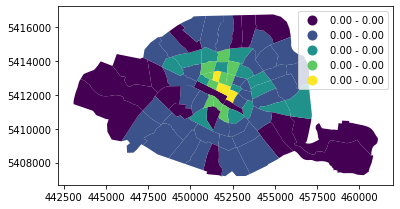

In [28]:
# Let's investigate a bit more choroplets!
#pip install mapclassify
#pip install pysal
import mapclassify
import pysal

# Make a choropleth of the number of stations
districts_stations.plot(column='n_stations', legend=True)
plt.show()

# Make a choropleth of the number of trees per area (same as in the previous cell)
districts_stations.plot(column='n_stations_per_area', legend=True)
plt.show()

# Make a choropleth with an equal interval scheme
districts_stations.plot(column='n_stations_per_area', scheme='equal_interval', legend=True)
plt.show()

We have too small "densities", so we would probably multiply the density var *1000.
However, the main difference between the first graph and the second twos is that we "normalize" the # of items per "area".

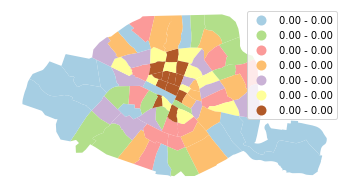

In [29]:
# Choroplet with "quantiles"  
# Generate the choropleth and store the axis
ax = districts_stations.plot(column='n_stations_per_area', scheme='quantiles',
                          k=7, cmap='Paired', legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()

In [30]:
# import geojson file for the arrondissements of Paris. We want to do some Spatial Operation (ex. intersection) in GeoPandas
import geopandas
arrondissement = geopandas.read_file('arrondissements.geojson')
arrondissement.head(5)

,n_sq_co,n_sq_ar,objectid,l_ar,longueur,surface,perimetre,l_aroff,c_arinsee,c_ar,geometry
0,750001537,750000001,1,1er Ardt,6054.680862,1.824613e+06,6054.936862,Louvre,75101,1,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
1,750001537,750000011,11,11ème Ardt,8281.635288,3.665442e+06,8282.011886,Popincourt,75111,11,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
2,750001537,750000016,16,16ème Ardt,17415.326726,1.637254e+07,17416.109657,Passy,75116,16,"POLYGON ((2.27427 48.87837, 2.27749 48.87796, ..."
3,750001537,750000019,19,19ème Ardt,11252.943229,6.792651e+06,11253.182479,Buttes-Chaumont,75119,19,"POLYGON ((2.38943 48.90122, 2.39014 48.90108, ..."
4,750001537,750000006,6,6ème Ardt,6483.324560,2.153096e+06,6483.686786,Luxembourg,75106,6,"POLYGON ((2.34459 48.85405, 2.34428 48.85375, ..."


{'init': 'epsg:32631'}
{'init': 'epsg:4326'}


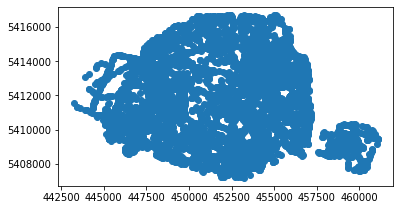

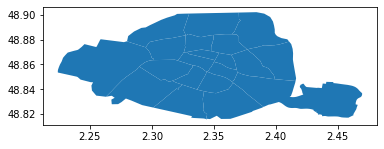

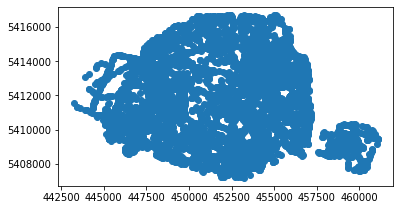

In [40]:
districts.plot()
print(districts.crs)
arrondissement.plot()
print(arrondissement.crs)

districts['geometry'].plot()

# districts_crs = districts.to_crs({'init': 'epsg:4326'})
# districts_crs.plot()

They have different "crs" systems

In [199]:
prova = arrondissement.geometry.area
prova*(100**4)

0      22366.194365
1      44928.290445
2     200687.497911
3      83301.999076
4      26386.272367
5      47570.522913
6      26708.895600
7      87581.822329
8      12150.886486
9      19617.099562
10     69520.359079
11     73540.254374
12     31117.474413
13     50130.261138
14     73346.586076
15     35455.889379
16     68785.487122
17     14352.825722
18    104089.263411
19    199886.521635
dtype: float64

In [191]:
villette.area

1284960.742390258

In [81]:
# Accessing the 19th Arrondis. geometry (Polygon) and Villette district
Arrond19 = arrondissement.loc[3, 'geometry']
villette = districts_stations.loc[72, 'geometry']

In [82]:
districts_stations.loc[72,:]

id                                                                    73
district_name                                                   Villette
population                                                         53650
geometry               POLYGON ((453844.6374796607 5414106.7643801, 4...
n_stations                                                            14
n_stations_per_area                                          1.08953e-05
Name: 72, dtype: object

In [109]:
districts_medPop = districts_bike.loc[(districts_bike.population>5000) & (districts_bike.population<20000)]
districts_medPop

In [113]:
combined = geopandas.overlay(districts_medPop,districts_stations, how='intersection')

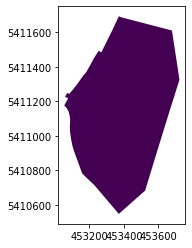

n_stations_per_area
0.000014    0.487009
Name: area, dtype: float64


In [119]:
## This ex. should've been done with multiattribute/"items" on a "class" (here "n_stations_per_area")
# Add the area as a column
combined['area'] = combined.geometry.area

# Take a subset for the Arsenal district
land_use_ars = combined[combined['district_name_1'] == 'Arsenal']

# Visualize the n_stations of the Arsenal district
land_use_ars.plot(column='n_stations_per_area')
plt.show()

# Calculate the total area for each land use class
print(land_use_ars.groupby('n_stations_per_area')['area'].sum() / 1000**2)

### New Dataset 
Exploring new dataset and ..

In [254]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

os.chdir(r"C:/Users/Daniele/Downloads/Congo")

# Read the mining site data
mining_sites = geopandas.read_file("cod_mines_curated_all_opendata_p_ipis.geojson")

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

                                                  id  vid  \
0  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    1   
1  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    2   
2  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    3   
3  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    4   
4  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    5   

                       source      project         pcode          name  \
0  IPIS - Ministère des Mines  IPIS - 2009  codmine00191          Eohe   
1  IPIS - Ministère des Mines  IPIS - 2009  codmine00192          Eita   
2  IPIS - Ministère des Mines  IPIS - 2009  codmine00242     Mungu Iko   
3  IPIS - Ministère des Mines  IPIS - 2009  codmine00260  Kiviri/Tayna   
4  IPIS - Ministère des Mines  IPIS - 2009  codmine00272       Makanga   

   visit_date  visit_onsite visit_onsite_novisitreason  longitude  latitude  \
0  2009-01-01             1                       None  28.712580  0.331880   
1  2009-01-01             1   

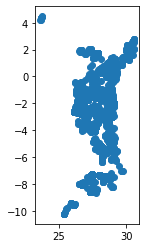

In [124]:
# Make a quick visualisation
mining_sites.plot()
plt.show()

        WDPAID   WDPA_PID PA_DEF                     NAME  \
0  555512072.0  555512072      1                 Yangambi   
1  555512074.0  555512074      1                   Mangai   
2  555512075.0  555512075      1          Lac Tshangalele   
3     124389.0     124389      1  Okapis Wildlife Reserve   
4      10906.0      10906      1    Salonga National Park   

                     ORIG_NAME                                          DESIG  \
0                     Yangambi                         RÃ©serve de BiosphÃ¨re   
1                       Mangai                             RÃ©serve Naturelle   
2              Lac Tshangalele                             RÃ©serve Naturelle   
3  RÃ©serve de faune Ã  okapis  Site du Patrimoine Mondial (naturel ou mixte)   
4  Parc national de la Salonga  Site du Patrimoine Mondial (naturel ou mixte)   

                                DESIG_ENG     DESIG_TYPE        IUCN_CAT  \
0                       Biosphere Reserve       National              

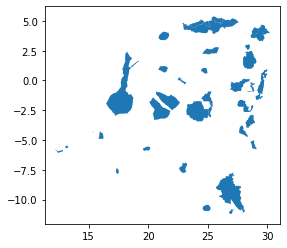

In [125]:
# upload the second ds (shapefile of congo)
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
national_parks = geopandas.read_file("WDPA_Mar2020_COD-shapefile-polygons.shp")

# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

# Make a quick visualisation
national_parks.plot()
plt.show()



Looking at the 2 dataset we can see that they have same "coordinates".

(in the datacamp ex they had diff coordinates).

[For the mining sites, it indicated EPSG:4326, so the dataset is expressed in geographical longitude/latitude. The last dataset, the national parks, is in projected coordinates. So we will need to make sure both datasets are in the same CRS to be able to use them together.]

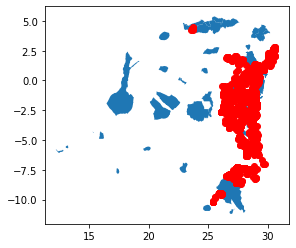

In [139]:
# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

#The following code was in case they have diff coordinates

# Convert both datasets to UTM projection
# mining_sites_utm = mining_sites.to_crs(epsg=32735)
# national_parks_utm = national_parks.to_crs(epsg=32735)

# # Plot the converted data again
# ax = national_parks_utm.plot()
# mining_sites_utm.plot(ax=ax, color='red')
# plt.show()

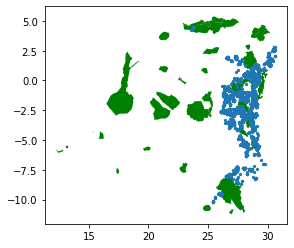

In [140]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5)
plt.show()

In [172]:
pd.set_option('display.max_columns', 500)
mining_sites.mineral1.unique() #check for None,NaN,null value

array(['Or', 'Cassitérite', 'Coltan', 'Wolframite', 'Cuivre', 'Diamant',
       'Monazite', None, 'Tourmaline', 'Tantalit', 'Améthyste'],
      dtype=object)

In [183]:
m = ['Or', 'Cassitérite', 'Coltan', 'Wolframite', 'Cuivre', 'Diamant',
       'Monazite', 'Tourmaline', 'Tantalit', 'Améthyste']
mining_sites = mining_sites.loc[mining_sites['mineral1'].isin(m)]

<Figure size 1440x720 with 0 Axes>

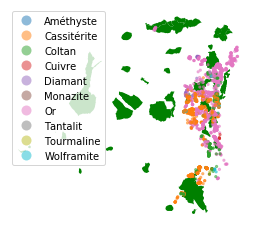

In [198]:
# Plot of the parks and mining sites, highlighting the "mineral"
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, column ='mineral1', markersize=5, alpha=0.5
                 , legend=True)
ax.set_axis_off()
plt.show()

In [204]:
mining_sites.loc[mining_sites['name']=='Goma']

,id,vid,source,project,pcode,name,visit_date,visit_onsite,visit_onsite_novisitreason,longitude,latitude,location_origin,province,province_old,territoire,collectivite,groupement,village,workers_numb,is_3t_mine,is_gold_mine,mineral1,selling_points_mineral1,final_destination_mineral1,mineral2,selling_points_mineral2,final_destination_mineral2,mineral3,selling_points_mineral3,final_destination_mineral3,mercury,presence,interference,armed_group1,type_armed_group1,frequency_armed_group1,taxation_armed_group1,commerce_taxation_armed_group1,entrance_taxation_armed_group1,monopoly_armed_group1,buying_minerals_armed_group1,digging_armed_group1,forced_labour_armed_group1,pillaging_armed_group1,armed_group2,type_armed_group2,frequency_armed_group2,taxation_armed_group2,commerce_taxation_armed_group2,entrance_taxation_armed_group2,monopoly_armed_group2,buying_minerals_armed_group2,digging_armed_group2,forced_labour_armed_group2,pillaging_armed_group2,state_service1,state_service2,state_service3,state_service4,itsci,qualification,geometry
928,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,929,IPIS - Ministère des Mines,IPIS - PROMINES MoFA 2013-2014,codmine00546,Goma,2013-06-17,1,None,26.712766,-1.448321,GPS,Maniema,Maniema,Punia,Babira-Bakwame,Batikamolembe,Matumba,53.0,0.0,1.0,Or,Punia,"Punia, Bukavu",None,None,None,None,None,None,NaN,0.0,0.0,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (26.71277 -1.44832)


In [217]:
goma = mining_sites.loc[mining_sites['name']=='Goma'].geometry
print(type(goma))

<class 'geopandas.geoseries.GeoSeries'>


In [232]:
# goma is a Point
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

# Calculate the area of national park within the buffer
print(national_parks.intersection(goma_buffer).area.sum() / (1000**2))

<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
1
0.0


In [238]:
national_parks

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,MARINE,REP_M_AREA,GIS_M_AREA,REP_AREA,GIS_AREA,NO_TAKE,NO_TK_AREA,STATUS,STATUS_YR,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,555512072.0,555512072,1,Yangambi,Yangambi,RÃ©serve de BiosphÃ¨re,Biosphere Reserve,National,Ia,Not Applicable,0,0.00,0.000000,2214.718012,2246.074353,Not Applicable,0.0,Designated,0,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1962,CD-OR,COD,COD,"POLYGON ((24.72603 1.07190, 24.76540 1.04186, ..."
1,555512074.0,555512074,1,Mangai,Mangai,RÃ©serve Naturelle,Nature Reserve,National,VI,Not Applicable,0,0.00,0.000000,1903.334292,1911.353090,Not Applicable,0.0,Designated,0,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1962,CD-BN,COD,COD,"POLYGON ((19.96213 -5.54481, 19.98117 -5.55433..."
2,555512075.0,555512075,1,Lac Tshangalele,Lac Tshangalele,RÃ©serve Naturelle,Nature Reserve,National,Not Reported,Not Applicable,0,0.00,0.000000,446.500000,3312.690855,Not Applicable,0.0,Designated,0,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1962,CD-KA,COD,COD,"POLYGON ((25.24399 -10.79955, 25.11379 -10.954..."
3,124389.0,124389,1,Okapis Wildlife Reserve,RÃ©serve de faune Ã okapis,Site du Patrimoine Mondial (naturel ou mixte),World Heritage Site (natural or mixed),International,Not Applicable,(x),0,0.00,0.000000,13726.250000,14034.208305,Not Applicable,0.0,Inscribed,1996,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,946,CD-OR,COD,COD,"POLYGON ((28.69669 2.47653, 28.69749 2.47501, ..."
4,10906.0,10906,1,Salonga National Park,Parc national de la Salonga,Site du Patrimoine Mondial (naturel ou mixte),World Heritage Site (natural or mixed),International,Not Applicable,(vii)(ix),0,0.00,0.000000,36000.000000,35321.977618,Not Applicable,0.0,Inscribed,1984,Not Reported,State,Institut Congolais pour la Conservation de la ...,Not Reported,State Verified,946,Not Reported,COD,COD,"MULTIPOLYGON (((20.43331 -1.42180, 20.43345 -1..."
5,2017.0,2017,1,Virunga National Park,Parc national des Virunga,Site du Patrimoine Mondial (naturel ou mixte),World Heritage Site (natural or mixed),International,Not Applicable,(vii)(viii)(x),0,0.00,0.000000,7900.000000,7822.569879,Not Applicable,0.0,Inscribed,1979,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,946,Not Reported,COD,COD,"MULTIPOLYGON (((29.95837 0.93337, 29.95945 0.9..."
6,555625801.0,555625801,1,Bassin de la Lufira,Bassin de la Lufira,"Site Ramsar, Zone Humide dâImportance Intern...","Ramsar Site, Wetland of International Importance",International,II,(ii)(iii)(iv),0,0.00,0.000000,44709.932000,43684.685600,Not Applicable,0.0,Designated,2017,Federal or national ministry or agency,State,Institut Congolais pour la Conservation de la ...,No,State Verified,1856,CD-KA,COD,COD,"MULTIPOLYGON (((27.24189 -10.76017, 27.24432 -..."
7,555626064.0,555626064,1,RÃ©serve du triangle de la Ngiri,RÃ©serve du triangle de la Ngiri,RÃ©serve Naturelle,Nature Reserve,National,Not Reported,Not Applicable,0,0.00,0.000000,5500.000000,5270.335341,Not Applicable,0.0,Designated,2011,Not Reported,Not Reported,Institut Congolais pour la Conservation de la ...,Not Reported,State Verified,1962,Not Reported,COD,COD,"POLYGON ((18.04801 0.77326, 18.04998 0.77388, ..."
8,555697863.0,555697863,1,Salonga,Parc National de la Salonga,Parc National,National Park,National,II,Not Applicable,0,0.00,0.000000,17140.599609,33592.750558,Not Applicable,0.0,Designated,1970,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1962,Not Reported,COD,COD,"MULTIPOLYGON (((20.47664 -1.53041, 20.47703 -1..."
9,9143.0,9143,1,RÃ©serve forestiÃ¨re de Luki,RÃ©serve forestiÃ¨re de Luki,UNESCO-MAB RÃ©serve de BiosphÃ¨re,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,0.00,0.000000,329.680000,313.085349,Not Applicable,0.0,Designated,1979,Not Reported,Not Reported,Not Reported,Not Re

### Mining sites within national parks
For this exercise, let's start with one of the national parks, the Kahuzi-Biega National park (which was extracted from the national_parks dataset and is provided as the kahuzi variable).

Which of the mining sites are located within this national park?

In [237]:
# Extract the single polygon for the Kahuzi-Biega National park
kahuzi = national_parks[national_parks['NAME'] == "Kahuzi-Biega National park"].geometry.squeeze()

# Take a subset of the mining sites located within Kahuzi
sites_kahuzi = mining_sites[mining_sites.geometry.within(kahuzi)]
print(sites_kahuzi)

# Determine in which national park a mining site is located
sites_within_park = geopandas.sjoin(mining_sites, national_parks, op='within', how='inner')
print(sites_within_park.head())

# The number of mining sites in each national park
print(sites_within_park['NAME'].value_counts())

Empty GeoDataFrame
Columns: [id, vid, source, project, pcode, name, visit_date, visit_onsite, visit_onsite_novisitreason, longitude, latitude, location_origin, province, province_old, territoire, collectivite, groupement, village, workers_numb, is_3t_mine, is_gold_mine, mineral1, selling_points_mineral1, final_destination_mineral1, mineral2, selling_points_mineral2, final_destination_mineral2, mineral3, selling_points_mineral3, final_destination_mineral3, mercury, presence, interference, armed_group1, type_armed_group1, frequency_armed_group1, taxation_armed_group1, commerce_taxation_armed_group1, entrance_taxation_armed_group1, monopoly_armed_group1, buying_minerals_armed_group1, digging_armed_group1, forced_labour_armed_group1, pillaging_armed_group1, armed_group2, type_armed_group2, frequency_armed_group2, taxation_armed_group2, commerce_taxation_armed_group2, entrance_taxation_armed_group2, monopoly_armed_group2, buying_minerals_armed_group2, digging_armed_group2, forced_labour_arm

88    Not Reported        COD  COD  
Bassin de la Lufira           41
Itombwe                       33
Luama-Kivu                    17
Kahuzi-Biega                  12
Bili-Uere                     12
Kahuzi-Biega National Park    11
Okapis Wildlife Reserve        9
Okapis                         9
Maiko                          6
Luama-Katanga                  5
Tayna                          2
Kisimba Ikobo                  1
Name: NAME, dtype: int64


### Finding the name of the closest National Park
Let's start with a custom query for a single mining site. Here, we will determine the name of the national park that is the closest to the specific mining site.
(in this case first mining site)

In [240]:
# Get the geometry of the first row
single_mine = mining_sites.geometry[0]

# Calculate the distance from each national park to this mine
dist = national_parks.distance(single_mine)

# The index of the minimal distance
idx = dist.idxmin()

# Access the name of the corresponding national park
closest_park = national_parks.loc[idx, 'NAME']
print(closest_park)

Maiko


In [245]:
# Define a function that returns the closest national park
def closest_national_park(geom, national_parks):
    dist = national_parks.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks.loc[idx, 'NAME']
    return closest_park

# Call the function on the single mine
# print(closest_national_park(single_mine, national_parks)) #Maiko

# Apply the function to all mining sites
mining_sites['closest_park'] = mining_sites.geometry.apply(closest_national_park, national_parks=national_parks)
print(mining_sites.head())

C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


                                                  id  vid  \
0  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    1   
1  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    2   
2  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    3   
3  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    4   
4  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    5   

                       source      project         pcode          name  \
0  IPIS - Ministère des Mines  IPIS - 2009  codmine00191          Eohe   
1  IPIS - Ministère des Mines  IPIS - 2009  codmine00192          Eita   
2  IPIS - Ministère des Mines  IPIS - 2009  codmine00242     Mungu Iko   
3  IPIS - Ministère des Mines  IPIS - 2009  codmine00260  Kiviri/Tayna   
4  IPIS - Ministère des Mines  IPIS - 2009  codmine00272       Makanga   

   visit_date  visit_onsite visit_onsite_novisitreason  longitude  latitude  \
0  2009-01-01             1                       None  28.712580  0.331880   
1  2009-01-01             1   

### COVID-19 ITALIA

In [255]:
os.chdir(r"C:/Users/Daniele/Downloads/covid")

ita_aree = geopandas.read_file('dpc-covid19-ita-aree.geojson')

In [257]:
print(ita_aree.head())
print(ita_aree.crs)

  localID  namespace versionID ID_Evento       ID_EventoS nomeLingua  \
0       1  IT.PCMDPC         1         1  COVID-19-Italia        ita   
1       2  IT.PCMDPC         1         1  COVID-19-Italia        ita   
2       3  IT.PCMDPC         1         1  COVID-19-Italia        ita   
3       4  IT.PCMDPC         1         1  COVID-19-Italia        ita   
4       5  IT.PCMDPC         1         1  COVID-19-Italia        ita   

       nomeStatus nomeOrigin   nomePronun     nomeFonte           nomeTesto  \
0  standardizzato   endonimo  unpopulated  comISTAT2019                 Vo'   
1  standardizzato   endonimo  unpopulated  comISTAT2019         San Fiorano   
2  standardizzato   endonimo  unpopulated  comISTAT2019    Casalpusterlengo   
3  standardizzato   endonimo  unpopulated  comISTAT2019  Castiglione d'Adda   
4  standardizzato   endonimo  unpopulated  comISTAT2019            Somaglia   

  nomeScript                   tipoZona  \
0       ital  humanHealthRestrictedZone   
1     

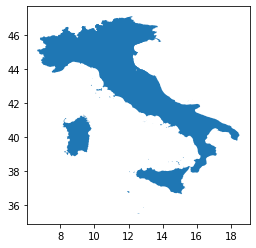

In [259]:
ita_aree.plot()
plt.show()

  localID  namespace versionID ID_Evento       ID_EventoS nomeLingua  \
0       1  IT.PCMDPC         1         1  COVID-19-Italia        ita   
1       2  IT.PCMDPC         1         1  COVID-19-Italia        ita   
2       3  IT.PCMDPC         1         1  COVID-19-Italia        ita   
3       4  IT.PCMDPC         1         1  COVID-19-Italia        ita   
4       5  IT.PCMDPC         1         1  COVID-19-Italia        ita   

       nomeStatus nomeOrigin   nomePronun     nomeFonte           nomeTesto  \
0  standardizzato   endonimo  unpopulated  comISTAT2019                 Vo'   
1  standardizzato   endonimo  unpopulated  comISTAT2019         San Fiorano   
2  standardizzato   endonimo  unpopulated  comISTAT2019    Casalpusterlengo   
3  standardizzato   endonimo  unpopulated  comISTAT2019  Castiglione d'Adda   
4  standardizzato   endonimo  unpopulated  comISTAT2019            Somaglia   

  nomeScript                   tipoZona  \
0       ital  humanHealthRestrictedZone   
1     

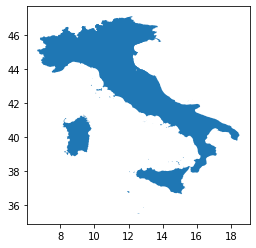

In [258]:
# Read the mining site data
ita_aree_sh = geopandas.read_file("dpc-covid19-ita-aree.shp")

# Print the first rows and the CRS information
print(ita_aree_sh.head())
print(ita_aree_sh.crs)

# Make a quick visualisation
ita_aree_sh.plot() #same as the previous one
plt.show()

In [454]:
# read csv (at 09 - March)
prov = pd.read_csv("dpc-covid19-ita-province.csv")
reg = pd.read_csv("dpc-covid19-ita-regioni.csv")
naz = pd.read_csv("dpc-covid19-ita-andamento-nazionale.csv")

In [261]:
prov.head(), reg.head(), naz.head()

(                  data stato  codice_regione denominazione_regione  \
 0  2020-02-24 18:00:00   ITA              13               Abruzzo   
 1  2020-02-24 18:00:00   ITA              13               Abruzzo   
 2  2020-02-24 18:00:00   ITA              13               Abruzzo   
 3  2020-02-24 18:00:00   ITA              13               Abruzzo   
 4  2020-02-24 18:00:00   ITA              13               Abruzzo   
 
    codice_provincia               denominazione_provincia sigla_provincia  \
 0                69                                Chieti              CH   
 1                66                              L'Aquila              AQ   
 2                68                               Pescara              PE   
 3                67                                Teramo              TE   
 4               979  In fase di definizione/aggiornamento             NaN   
 
          lat       long  totale_casi  
 0  42.351032  14.167546            0  
 1  42.351222  13.3984

In [262]:
# Visualise the national "outbreak"
naz.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,24/02/2020 18:00,ITA,101,26,127,94,221,221,1,7,229,4324
1,25/02/2020 18:00,ITA,114,35,150,162,311,90,1,10,322,8623
2,26/02/2020 18:00,ITA,128,36,164,221,385,74,3,12,400,9587
3,27/02/2020 18:00,ITA,248,56,304,284,588,203,45,17,650,12014
4,28/02/2020 18:00,ITA,345,64,409,412,821,233,46,21,888,15695


In [455]:
# create "daily increase" on deaths and TI
naz['deceduti daily'] = naz['deceduti'].diff()
naz['TI_daily'] = naz['terapia_intensiva'].diff()
naz.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,deceduti daily,TI_daily
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324,NaN,NaN
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623,3.0,9.0
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587,2.0,1.0
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014,5.0,20.0
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695,4.0,8.0


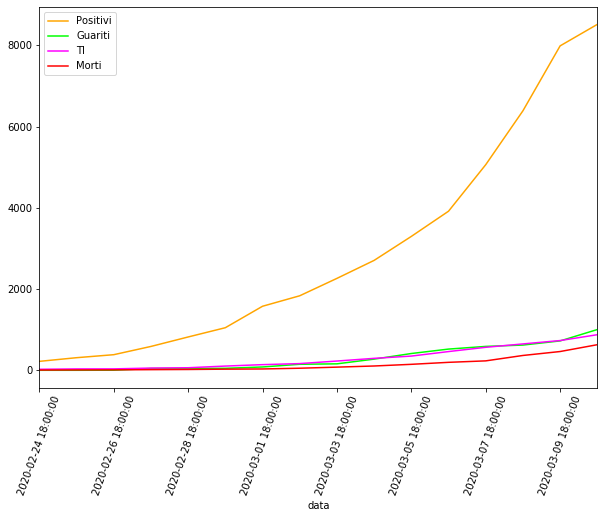

In [457]:
# Trend-plot (on total)
labels = ['Positivi', 'Guariti','TI', 'Morti']

#colors
colors = ['orange','lime','magenta' ,'red']


naz.plot(x='data', y=['totale_attualmente_positivi',
                         'dimessi_guariti','terapia_intensiva',
                         'deceduti'],
            label=labels, color=colors, figsize=(10,7))
plt.xticks(rotation=70)
plt.show()

In [458]:
#stacked plot (total aggr)
naz_x = naz['data'] # create x axis
naz_y = np.vstack([naz['totale_attualmente_positivi'],
                   naz['dimessi_guariti'],
                   naz['terapia_intensiva'],
                   naz['deceduti']])

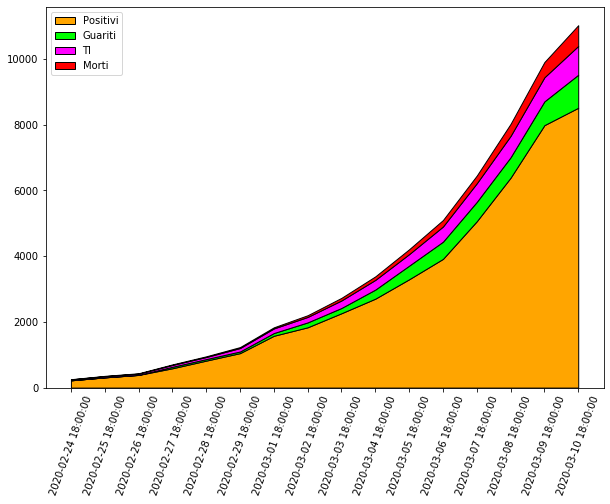

In [459]:
# stacked plots
labels = ['Positivi', 'Guariti','TI', 'Morti']

#colors
colors = ['orange','lime','magenta' ,'red']

plt.figure(figsize=(10,7))

plt.stackplot(naz_x, 
              naz_y,            
              labels=labels, colors=colors,
             edgecolor='black')

plt.xticks(rotation=70)

plt.legend(loc=2)
plt.show()

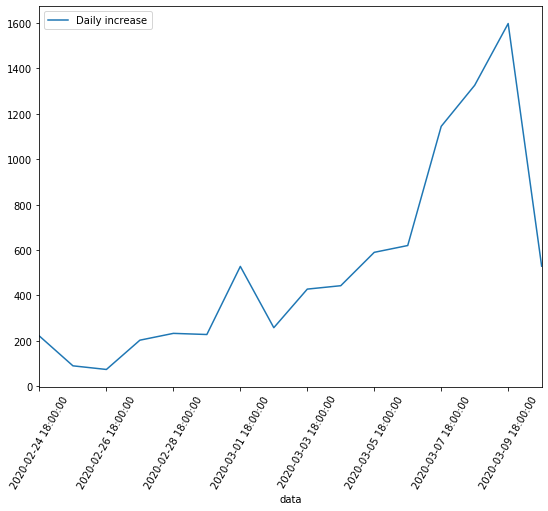

In [460]:
# daily (total) increase ("nuovi_attualmente_positivi")
legend = ['Daily increase']
naz.plot(x='data', y='nuovi_attualmente_positivi', figsize=(9,7))

plt.xticks(rotation=60)
plt.legend(legend,loc=2)
plt.show()

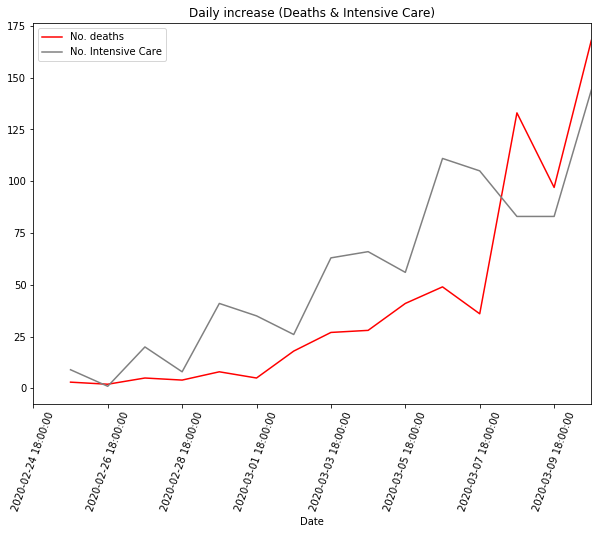

In [461]:
#daily increases plot
legend = ['No. deaths', 'No. Intensive Care']
colors = ['red' ,'gray']
naz.plot(x='data', y=['deceduti daily',
                         'TI_daily'],
            #label=labels, 
         color=colors, 
         figsize=(10,7))
plt.xticks(rotation=70)
plt.legend(legend,loc=2)
plt.title('Daily increase (Deaths & Intensive Care)')
plt.xlabel('Date')
plt.show()

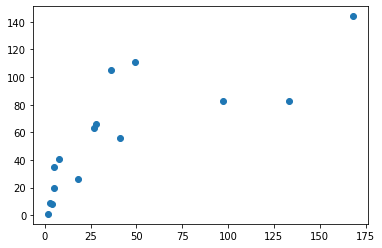

In [462]:
plt.scatter(x=naz['deceduti daily'], y=naz['TI_daily'])

In [463]:
#regional analysis
reg.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [464]:
import seaborn as sns
def plot_time_variation(df, y, hue='denominazione_regione', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x="data", y=y, hue=hue, data=df)
    plt.xticks(rotation=70)
    plt.title(f'{y} grouped by Region')
    plt.show()  

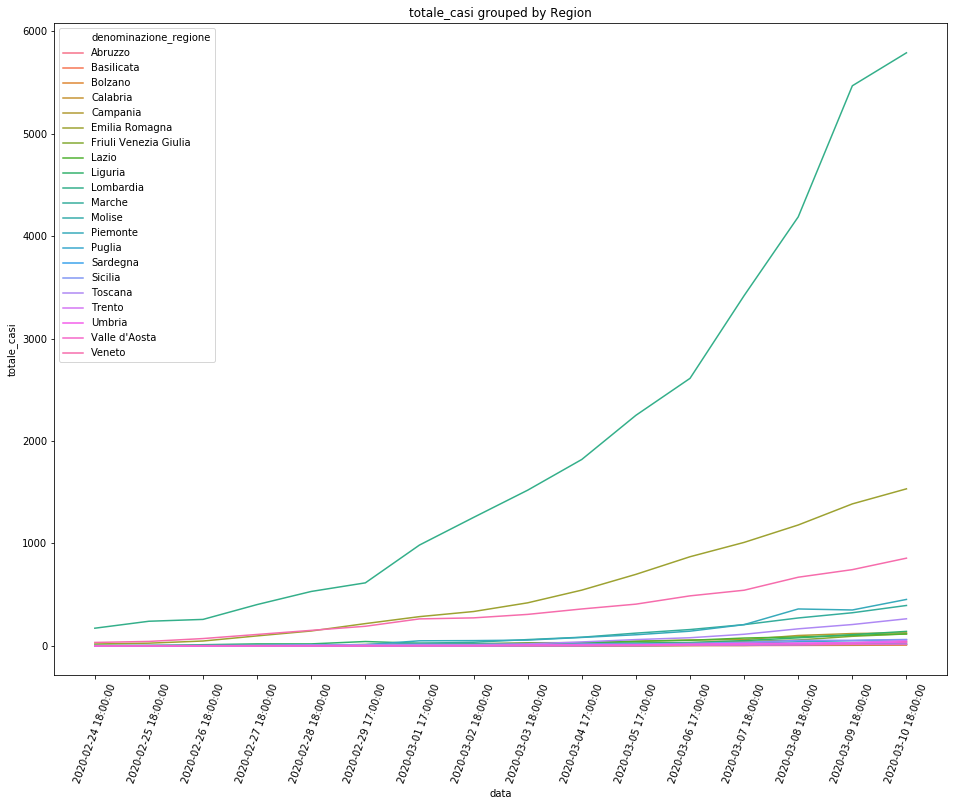

In [465]:
# Total cases
plot_time_variation(reg, y='totale_casi',size=4)

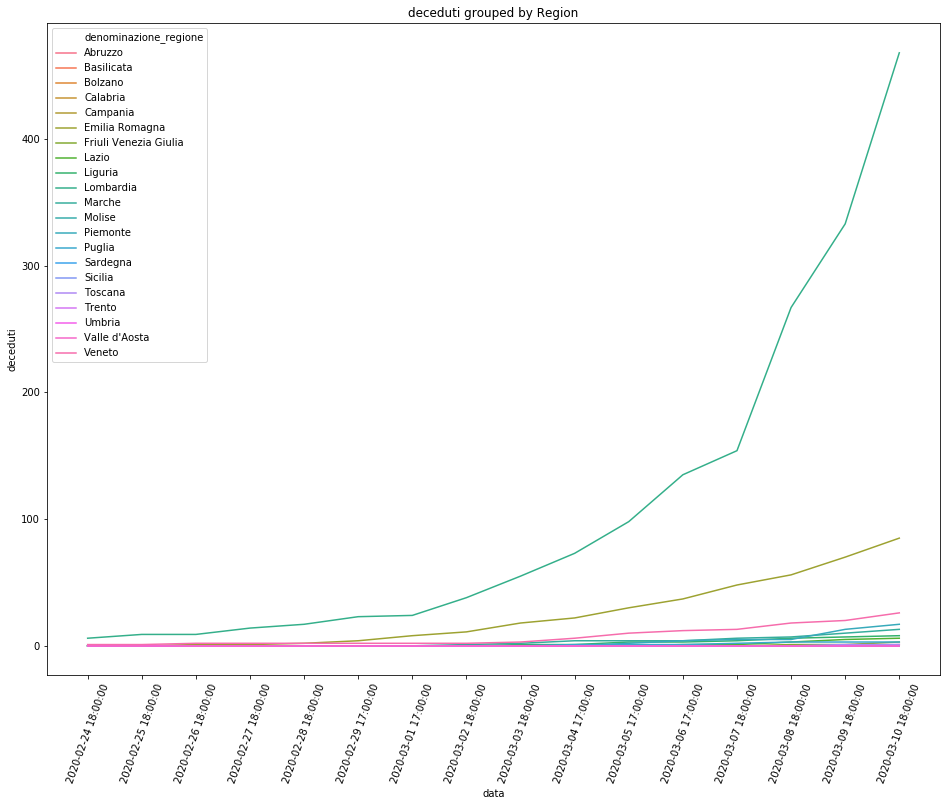

In [466]:
#Total deaths
plot_time_variation(reg, y='deceduti', size=4)

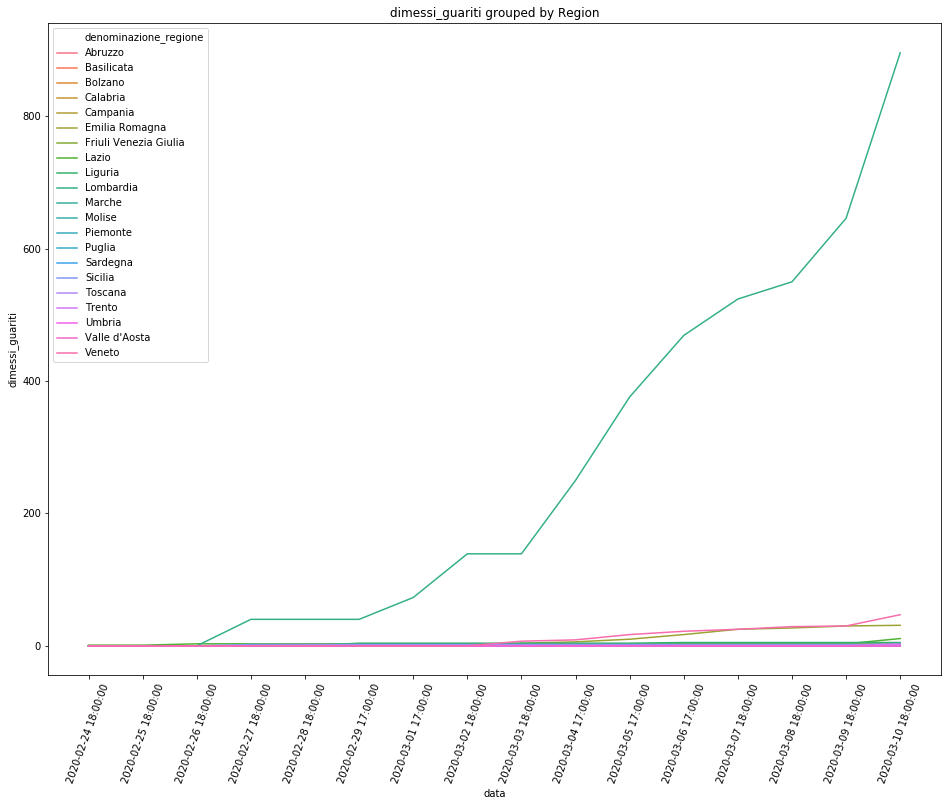

In [471]:
# Total recovered
plot_time_variation(reg, y='dimessi_guariti', size=4)

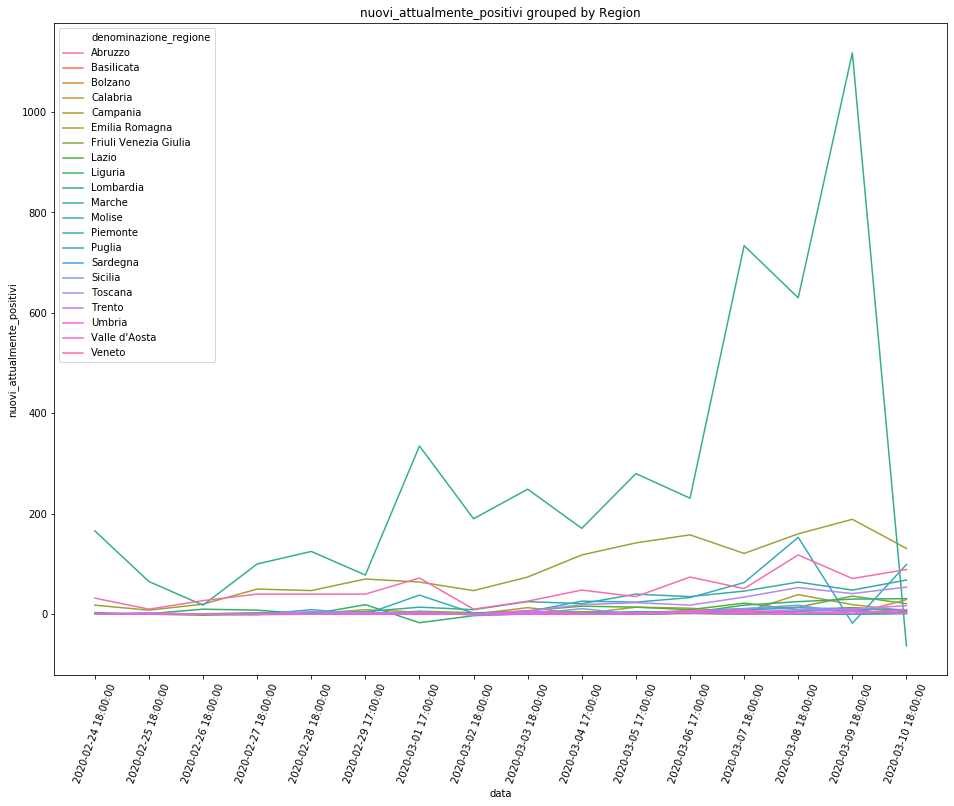

In [469]:
# New (total daily) infected
plot_time_variation(reg, y='nuovi_attualmente_positivi', size=4)

In [347]:
#geopandas
italy = geopandas.read_file('dpc-covid19-ita-aree.geojson')
italy.head();

In [472]:
reg_json = pd.read_json('dpc-covid19-ita-regioni.json')
reg_json.head()

,codice_regione,data,deceduti,denominazione_regione,dimessi_guariti,isolamento_domiciliare,lat,long,nuovi_attualmente_positivi,ricoverati_con_sintomi,stato,tamponi,terapia_intensiva,totale_attualmente_positivi,totale_casi,totale_ospedalizzati
0,13,2020-02-24 18:00:00,0,Abruzzo,0,0,42.351222,13.398438,0,0,ITA,5,0,0,0,0
1,17,2020-02-24 18:00:00,0,Basilicata,0,0,40.639471,15.805148,0,0,ITA,0,0,0,0,0
2,4,2020-02-24 18:00:00,0,Bolzano,0,0,46.499335,11.356624,0,0,ITA,1,0,0,0,0
3,18,2020-02-24 18:00:00,0,Calabria,0,0,38.905976,16.594402,0,0,ITA,1,0,0,0,0
4,15,2020-02-24 18:00:00,0,Campania,0,0,40.839566,14.250850,0,0,ITA,10,0,0,0,0


In [473]:
filtered_regdata_last = reg.drop_duplicates(subset = ['denominazione_regione'],keep='last')
filtered_regdata_last.head() #plus chech 21rows w info or manually

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
315,2020-03-10 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,17,9,26,11,37,7,0,1,38,310
316,2020-03-10 18:00:00,ITA,17,Basilicata,40.639471,15.805148,2,0,2,5,7,2,0,0,7,148
317,2020-03-10 18:00:00,ITA,4,Bolzano,46.499335,11.356624,17,1,18,20,38,29,0,0,38,36
318,2020-03-10 18:00:00,ITA,18,Calabria,38.109228,15.643453,8,2,10,1,11,2,2,0,13,360
319,2020-03-10 18:00:00,ITA,15,Campania,40.839566,14.250850,33,8,41,85,126,7,1,0,127,1141


In [358]:
reg.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 16 columns):
data                           315 non-null object
stato                          315 non-null object
codice_regione                 315 non-null int64
denominazione_regione          315 non-null object
lat                            315 non-null float64
long                           315 non-null float64
ricoverati_con_sintomi         315 non-null int64
terapia_intensiva              315 non-null int64
totale_ospedalizzati           315 non-null int64
isolamento_domiciliare         315 non-null int64
totale_attualmente_positivi    315 non-null int64
nuovi_attualmente_positivi     315 non-null int64
dimessi_guariti                315 non-null int64
deceduti                       315 non-null int64
totale_casi                    315 non-null int64
tamponi                        315 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 39.5+ KB


In [474]:
filtered_regdata_last = filtered_regdata_last.reset_index() #reset index

In [372]:
os.environ['PROJ_LIB'] = 'C:/Users/Daniele/Anaconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
from mpl_toolkits.basemap import Basemap

In [384]:
level, deaths

(array([  30,    5,    9,    9,  119, 1286,   89,   94,   97, 4490,  313,
          14,  337,   46,   19,   52,  206,   33,   28,   15,  694],
       dtype=int64),
 array([  0,   0,   0,   0,   0,  70,   1,   5,   7, 333,  10,   0,  13,
          3,   0,   0,   1,   0,   0,   0,  20], dtype=int64))

C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


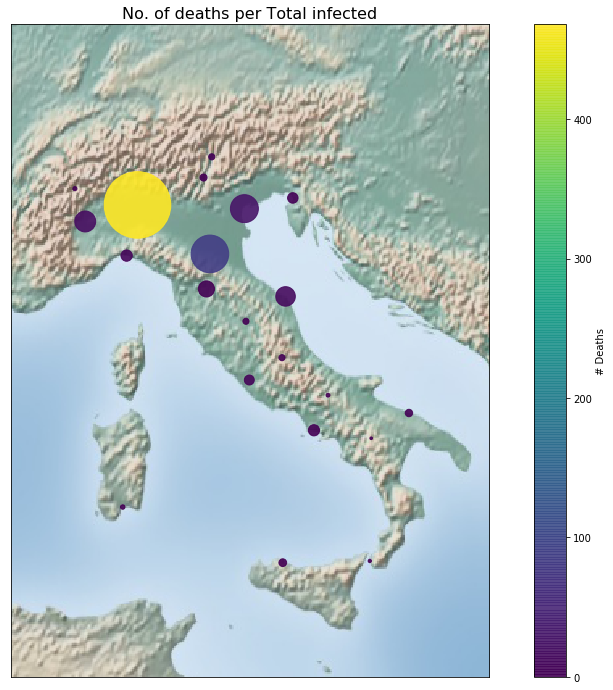

In [475]:
# create 2 numpy arrays with Lat and Long values (+ size of features to be examined)
lat = filtered_regdata_last['lat'].values;
lon = filtered_regdata_last['long'].values;
level = filtered_regdata_last['totale_attualmente_positivi'].values; #level positive case
deaths = filtered_regdata_last['deceduti'].values;


plt.figure(figsize=(16,12))

m = Basemap(projection='lcc', resolution='l',
           lat_0=42.5, lon_0=12.50,
           width=1.1E6, height=1.5E6)
#m.drawcoastlines()
#m.drawcountries()
#m.drawstates(color='gray')
m.shadedrelief() #Out of memory

# color (c) reflects the "no. of deaths" while size (s) # of total infected
m.scatter(lon, lat, latlon=True, c=deaths, s=level, cmap='viridis', label= 'Deaths/Infected by Location', alpha =0.9)

#plt.ylabel("Latitude", fontsize=14)
#plt.xlabel("Longitude", fontsize=14)
plt.title("No. of deaths per Total infected", fontsize = 16)
#plt.legend(scatterpoints=1, fontsize=6)
plt.colorbar(label='# Deaths')
plt.show()

In [476]:
# Situation within italian provinces
filtered_provdata_last = prov.drop_duplicates(subset = ['denominazione_provincia'],keep='last')
filtered_provdata_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1920 to 2047
Data columns (total 10 columns):
data                       108 non-null object
stato                      108 non-null object
codice_regione             108 non-null int64
denominazione_regione      108 non-null object
codice_provincia           108 non-null int64
denominazione_provincia    108 non-null object
sigla_provincia            106 non-null object
lat                        108 non-null float64
long                       108 non-null float64
totale_casi                108 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 9.3+ KB


C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


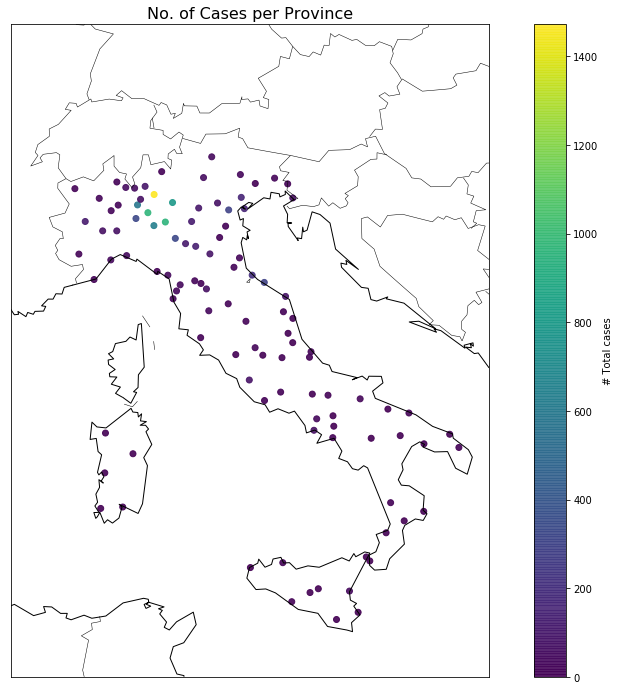

In [477]:
# create 2 numpy arrays with Lat and Long values (+ size of features to be examined)
lat = filtered_provdata_last['lat'].values;
lon = filtered_provdata_last['long'].values;
level = filtered_provdata_last['totale_casi'].values; #total cases
# deaths = filtered_provdata_last['deceduti'].values; #we do not have deaths per province


plt.figure(figsize=(16,12))

m = Basemap(projection='lcc', resolution='l',
           lat_0=42.5, lon_0=12.50,
           width=1.1E6, height=1.5E6)
m.drawcoastlines()
m.drawcountries()
m.drawstates(color='gray')
#m.shadedrelief() #Out of memory

# color (c) reflects the "no. of deaths" while size (s) # of total infected
m.scatter(lon, lat, latlon=True, c=level, cmap='viridis', label= 'Total Cases by Location', alpha =0.9)

#plt.ylabel("Latitude", fontsize=14)
#plt.xlabel("Longitude", fontsize=14)
plt.title("No. of Cases per Province", fontsize = 16)
#plt.legend(scatterpoints=1, fontsize=6)
plt.colorbar(label='# Total cases')
plt.show()

In [441]:
prov_sh = geopandas.read_file('IT_provinces.geojson')
prov_sh; #check

In [478]:
# merge prov and prov shape
prov_merged = prov_sh.merge(filtered_provdata_last, left_on ='prov_name',
                           right_on ='denominazione_provincia')
prov_merged #check

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",2020-03-10 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,111
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",2020-03-10 18:00:00,ITA,1,Piemonte,2,Vercelli,VC,45.323981,8.423234,18
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",2020-03-10 18:00:00,ITA,1,Piemonte,3,Novara,NO,45.445885,8.621916,22
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",2020-03-10 18:00:00,ITA,1,Piemonte,4,Cuneo,CN,44.393296,7.551172,14
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",2020-03-10 18:00:00,ITA,1,Piemonte,5,Asti,AT,44.899129,8.204143,58
5,Alessandria,6,AL,Piemonte,01,1,006,"POLYGON ((8.40875 44.70687, 8.41158 44.70680, ...",2020-03-10 18:00:00,ITA,1,Piemonte,6,Alessandria,AL,44.912974,8.615401,65
6,Biella,96,BI,Piemonte,01,1,096,"POLYGON ((8.23727 45.70164, 8.24760 45.69494, ...",2020-03-10 18:00:00,ITA,1,Piemonte,96,Biella,BI,45.566511,8.054082,20
7,Verbano-Cusio-Ossola,103,VB,Piemonte,01,1,103,"POLYGON ((8.01218 46.01191, 8.01296 46.01608, ...",2020-03-10 18:00:00,ITA,1,Piemonte,103,Verbano-Cusio-Ossola,VB,45.921446,8.551079,11
8,Varese,12,VA,Lombardia,03,3,012,"POLYGON ((8.57964 45.75172, 8.57532 45.75629, ...",2020-03-10 18:00:00,ITA,3,Lombardia,12,Varese,VA,45.817017,8.822868,50
9,Como,13,CO,Lombardia,03,3,013,"MULTIPOLYGON (((8.95038 45.71987, 8.95057 45.7...",2020-03-10 18:00:00,ITA,3,Lombardia,13,Como,CO,45.809991,9.085160,46


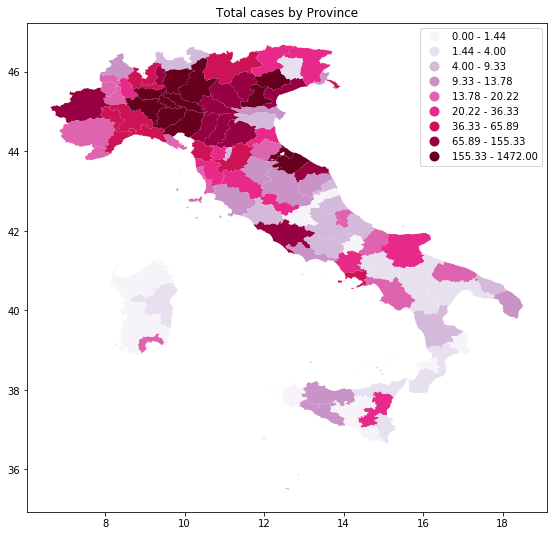

In [524]:
#plot merged file - QUANTILES
ax = prov_merged.plot(column='totale_casi', cmap =    
                                'PuRd', figsize=(15,9),   
                                 scheme='quantiles', k=9, legend =  
                                  True);

ax.set_title('Total cases by Province')
plt.show()

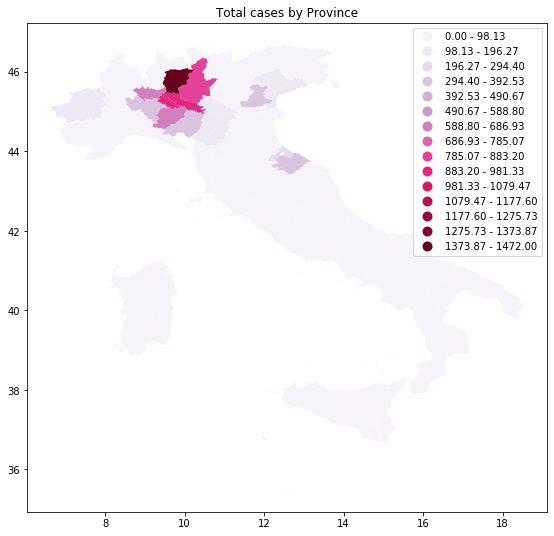

In [523]:
#plot merged file. EQUAL INTERVAL SCHEME
ax = prov_merged.plot(column='totale_casi', cmap =    
                                'PuRd', figsize=(15,9),   
                                 scheme='equal_interval', k=15, legend =  
                                  True);

ax.set_title('Total cases by Province')
plt.show()

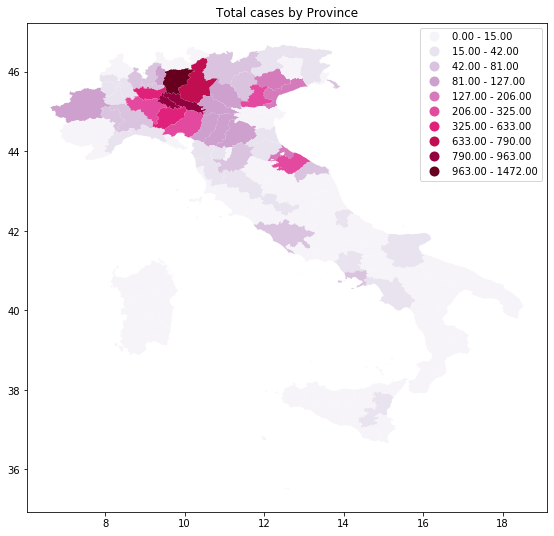

In [522]:
#plot merged file. - FISHER JENKS SCHEME
ax = prov_merged.plot(column='totale_casi', cmap =    
                                'PuRd', figsize=(15,9),   
                                 scheme='fisher_jenks', k=10, legend =  
                                  True);

ax.set_title('Total cases by Province')
plt.show()

In [497]:
## import regions shapefile + merge
reg_sh = geopandas.read_file('IT_regions.geojson')
reg_sh; #check)

In [494]:
filtered_regdata_last

,index,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,315,2020-03-10 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,17,9,26,11,37,7,0,1,38,310
1,316,2020-03-10 18:00:00,ITA,17,Basilicata,40.639471,15.805148,2,0,2,5,7,2,0,0,7,148
2,317,2020-03-10 18:00:00,ITA,4,Bolzano,46.499335,11.356624,17,1,18,20,38,29,0,0,38,36
3,318,2020-03-10 18:00:00,ITA,18,Calabria,38.109228,15.643453,8,2,10,1,11,2,2,0,13,360
4,319,2020-03-10 18:00:00,ITA,15,Campania,40.839566,14.250850,33,8,41,85,126,7,1,0,127,1141
5,320,2020-03-10 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,669,98,767,650,1417,131,31,85,1533,5494
6,321,2020-03-10 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,27,6,33,77,110,21,3,3,116,1602
7,322,2020-03-10 18:00:00,ITA,12,Lazio,41.892770,12.483667,50,15,65,34,99,5,11,6,116,3591
8,323,2020-03-10 18:00:00,ITA,7,Liguria,44.411493,8.932699,57,29,86,42,128,31,5,8,141,694
9,324,2020-03-10 18:00:00,ITA,3,Lombardia,45.466794,9.190347,3319,466,3785,642,4427,-63,896,468,5791,21479


In [499]:
# merge prov and prov shape
reg_merged = reg_sh.merge(filtered_regdata_last, left_on ='reg_name',
                           right_on ='denominazione_regione')
reg_merged; #check

In [500]:
reg_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 21 columns):
reg_name                       20 non-null object
reg_istat_code_num             20 non-null int64
reg_istat_code                 20 non-null object
geometry                       20 non-null geometry
index                          20 non-null int64
data                           20 non-null object
stato                          20 non-null object
codice_regione                 20 non-null int64
denominazione_regione          20 non-null object
lat                            20 non-null float64
long                           20 non-null float64
ricoverati_con_sintomi         20 non-null int64
terapia_intensiva              20 non-null int64
totale_ospedalizzati           20 non-null int64
isolamento_domiciliare         20 non-null int64
totale_attualmente_positivi    20 non-null int64
nuovi_attualmente_positivi     20 non-null int64
dimessi_guariti                20 non-null i

In [521]:
# CHOROPLETH (interactive) work in progress
#!pip install plotly
# from plotly.offline import init_notebook_mode, iplot
# import plotly.plotly as py
# import plotly.figure_factory as FF
# from plotly import tools
import plotly.graph_objs as go

for col in reg_merged.columns:
    reg_merged[col] = reg_merged[col].astype(str)

reg_merged['tot'] = reg_merged['reg_name'] + '<br>' + \
    'Hospitalised ' + reg_merged['ricoverati_con_sintomi'] + ' Intensive Care ' + reg_merged['terapia_intensiva'] + '<br>' + \
    'Quarantine ' + reg_merged['isolamento_domiciliare'] + 'Recovered ' + reg_merged['dimessi_guariti'] + '<br>' + \
    'Dead patients ' + reg_merged['deceduti']

fig = go.Figure(data=go.Choropleth(
    locations=reg_merged['lat'],
    z=reg_merged['totale_casi'],
    #locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=reg_merged['tot'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

# fig.update_layout(
#     title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)'
#     ,
#     geo = dict(
#         scope='europe',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

fig.show()

In [13]:
import os
import seaborn as sns
os.getcwd()

'C:\\Users\\Daniele\\Downloads\\covid'

In [3]:
os.chdir(r'C:\Users\Daniele\Downloads\covid')

In [157]:
covid2 = pd.read_excel('graphs.xlsx')

In [158]:
covid2['Pct Tamponi'] = covid2['Pct Tamponi']*100
covid2['Casi/Pop'] = covid2['Casi/Pop']*1000

In [159]:
covid2

,Regioni,Pct Tamponi,Casi tot,Pop_Reg,Casi/Pop,Tamponi,Tamp/Pop(*1000)
0,Abruzzo,13.566351,229,1311580,0.174599,1688,1.286997
1,Basilicata,7.633588,20,562869,0.035532,262,0.465472
2,Calabria,8.816705,114,1947131,0.058548,1293,0.664054
3,Campania,17.132216,460,5801692,0.079287,2685,0.462796
4,Emilia Romagna,27.091661,3931,4459477,0.881494,14510,3.253745
5,Friuli Venezia Giulia,7.946753,394,1215220,0.324221,4958,4.079920
6,Lazio,6.432811,607,5879082,0.103247,9436,1.605012
7,Liguria,31.008370,778,1559640,0.498833,2509,1.608705
8,Lombardia,34.920020,16220,10060574,1.612234,46449,4.616933
9,Marche,42.511628,1371,1525271,0.898857,3225,2.114378


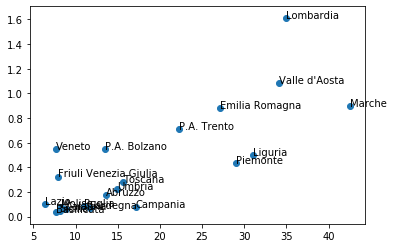

In [142]:
x = covid2_woIt['Pct Tamponi']
y = covid2_woIt['Casi/Pop']
z = covid2_woIt['Casi tot']
s = covid2_woIt['Regioni']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(s):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

In [161]:
# remove "Italy" (national aggregate)
covid2_woIt = covid2[:-1]

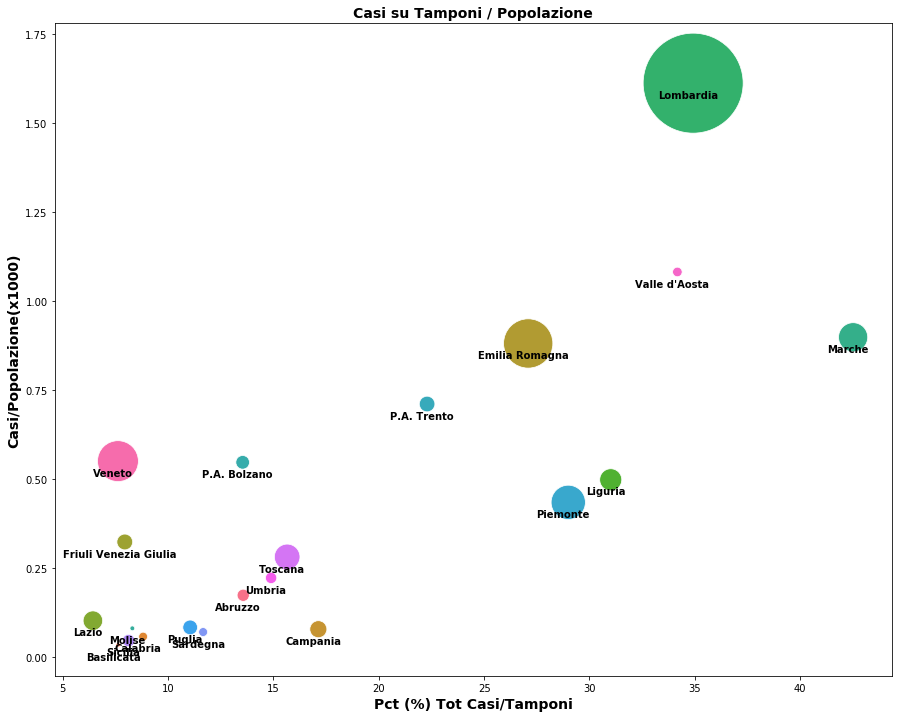

In [185]:
import matplotlib.pyplot as plt

s = covid2_woIt['Regioni'] 


plt.figure(figsize=(15,12))
sns.scatterplot(x='Pct Tamponi', y='Casi/Pop', data=covid2_woIt, hue='Regioni', 
                size='Casi tot', sizes = (20, 10000), legend=False
               )
#g = (g.set_axis_labels("aa","bb"))
#plt.legend(loc=2)
for i,txt in enumerate(s):
    plt.annotate(txt, (x[i], y[i]), xycoords='data',
                ha='center',
             xytext=(-5, -15), textcoords='offset points', weight='bold')
           # , textcoords='axes point')
    
plt.title('Casi su Tamponi / Popolazione', fontsize=14, fontweight='bold')
plt.ylabel('Casi/Popolazione(x1000)', fontsize=14, fontweight='bold')
plt.xlabel('Pct (%) Tot Casi/Tamponi', fontsize=14, fontweight='bold')
plt.annotate
plt.show()

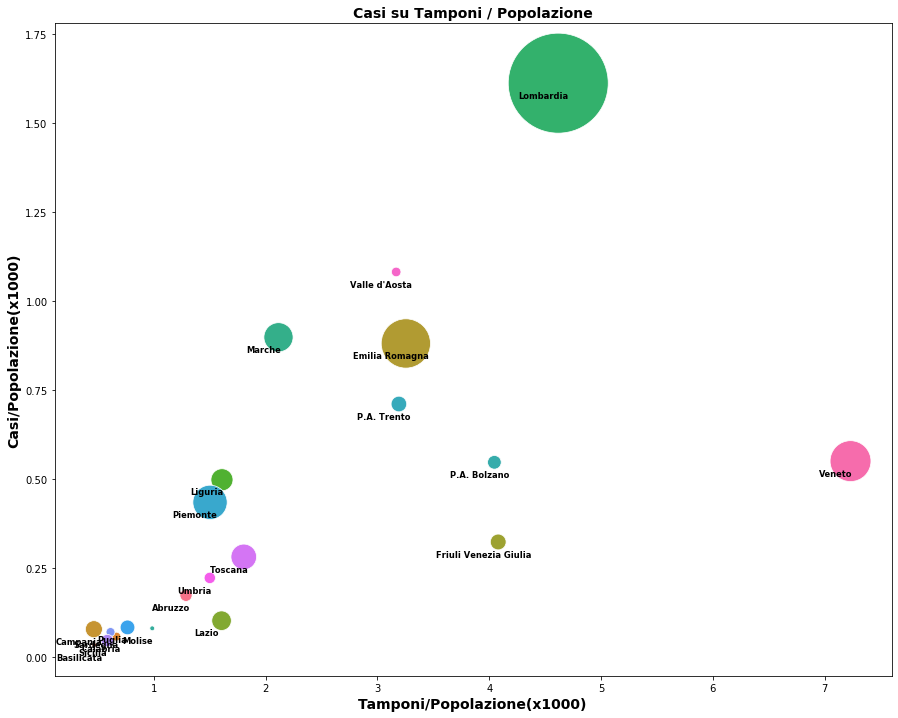

In [197]:
import matplotlib.pyplot as plt

w = covid2_woIt['Regioni'] 
x = covid2_woIt['Tamp/Pop(*1000)']
y = covid2_woIt['Casi/Pop']
z = covid2_woIt['Casi tot']


plt.figure(figsize=(15,12))
sns.scatterplot(x='Tamp/Pop(*1000)', y='Casi/Pop', data=covid2_woIt, hue='Regioni', 
                size='Casi tot', sizes = (20, 10000), legend=False
               )
#g = (g.set_axis_labels("aa","bb"))
#plt.legend(loc=2)
for i,j in enumerate(w):
    plt.annotate(j, (x[i], y[i])
                 , xycoords='data'
                ,ha='center'
            , xytext=(-15, -15), textcoords='offset points',weight='bold', size='small')
#           # , textcoords='axes point')
    
plt.title('Casi su Tamponi / Popolazione', fontsize=14, fontweight='bold')
plt.ylabel('Casi/Popolazione(x1000)', fontsize=14, fontweight='bold')
plt.xlabel('Tamponi/Popolazione(x1000)', fontsize=14, fontweight='bold')
plt.annotate
plt.show()

In [4]:
### 19th March#### - Ex about choropleth map and slider (link_ https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
import os
import pandas as pd
import plotly
import plotly.graph_objs as go



import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




init_notebook_mode(connected=True)

In [5]:
# fix the wd
os.chdir(r'C:\Users\Daniele\Downloads\covid')

In [9]:
df_merged = pd.read_csv('CrimeStatebyState_1960-2014.csv')
df_merged.head()

,State,Year,Population,Violent_crime_total,Murder_and_nonnegligent_Manslaughter,Murder_per100000,Legacy_rape_/1,Revised_rape_/2,Robbery,Aggravated_assault,State_code
0,Alabama,1960,3266740,6097,406,12.428292,281,NaN,898,4512,AL
1,Alabama,1961,3302000,5564,427,12.931557,252,NaN,630,4255,AL
2,Alabama,1962,3358000,5283,316,9.410363,218,NaN,754,3995,AL
3,Alabama,1963,3347000,6115,340,10.158351,192,NaN,828,4755,AL
4,Alabama,1964,3407000,7260,316,9.275022,397,NaN,992,5555,AL


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
State                                   2800 non-null object
Year                                    2800 non-null int64
Population                              2800 non-null int64
Violent_crime_total                     2800 non-null int64
Murder_and_nonnegligent_Manslaughter    2800 non-null int64
Murder_per100000                        2800 non-null float64
Legacy_rape_/1                          2800 non-null int64
Revised_rape_/2                         102 non-null float64
Robbery                                 2800 non-null int64
Aggravated_assault                      2800 non-null int64
State_code                              2800 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 240.7+ KB


In [11]:
year = 1960




df_sected_crime = df_merged[(df_merged['State']!= 'District of Columbia' ) &\
                            (df_merged['Year']== year )]


In [24]:
df_sected_crime

,State,Year,Population,Violent_crime_total,Murder_and_nonnegligent_Manslaughter,Murder_per100000,Legacy_rape_/1,Revised_rape_/2,Robbery,Aggravated_assault,State_code,text
0,Alabama,1960,3266740,6097,406,12.428292426099999,281,nan,898,4512,AL,AlabamaPop:3266740Murder rate:12.428292426099999
55,Alaska,1960,226167,236,23,10.1694765372,47,nan,64,102,AK,AlaskaPop:226167Murder rate:10.1694765372
110,Arizona,1960,1302161,2704,78,5.9900427059000005,209,nan,706,1711,AZ,ArizonaPop:1302161Murder rate:5.9900427059000005
165,Arkansas,1960,1786272,1924,152,8.5093423622,159,nan,443,1170,AR,ArkansasPop:1786272Murder rate:8.5093423622
220,California,1960,15717204,37558,616,3.9192721555000003,2859,nan,15287,18796,CA,CaliforniaPop:15717204Murder rate:3.9192721555...
275,Colorado,1960,1753947,2408,73,4.1620413844,229,nan,1362,744,CO,ColoradoPop:1753947Murder rate:4.1620413844
330,Connecticut,1960,2535234,928,41,1.6172077213,103,nan,236,548,CT,ConnecticutPop:2535234Murder rate:1.6172077213
385,Delaware,1960,446292,375,33,7.3942620526,41,nan,157,144,DE,DelawarePop:446292Murder rate:7.3942620526
495,Florida,1960,4951560,11061,527,10.6431104541,403,nan,4005,6126,FL,FloridaPop:4951560Murder rate:10.6431104541
550,Georgia,1960,3943116,6262,469,11.8941466596,294,nan,974,4525,GA,GeorgiaPop:3943116Murder rate:11.8941466596


In [26]:
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], 
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds



for col in df_sected_crime.columns:
    df_sected_crime[col] = df_sected_crime[col].astype(str)




df_sected_crime['text'] = df_sected_crime['State']+'Pop: '+df_sected_crime['Population']+'Murder rate: '+df_sected_crime['Murder_per100000']


C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
df_sected_crime

,State,Year,Population,Violent_crime_total,Murder_and_nonnegligent_Manslaughter,Murder_per100000,Legacy_rape_/1,Revised_rape_/2,Robbery,Aggravated_assault,State_code,text
0,Alabama,1960,3266740,6097,406,12.428292426099999,281,nan,898,4512,AL,AlabamaPop: 3266740Murder rate: 12.42829242609...
55,Alaska,1960,226167,236,23,10.1694765372,47,nan,64,102,AK,AlaskaPop: 226167Murder rate: 10.1694765372
110,Arizona,1960,1302161,2704,78,5.9900427059000005,209,nan,706,1711,AZ,ArizonaPop: 1302161Murder rate: 5.990042705900...
165,Arkansas,1960,1786272,1924,152,8.5093423622,159,nan,443,1170,AR,ArkansasPop: 1786272Murder rate: 8.5093423622
220,California,1960,15717204,37558,616,3.9192721555000003,2859,nan,15287,18796,CA,CaliforniaPop: 15717204Murder rate: 3.91927215...
275,Colorado,1960,1753947,2408,73,4.1620413844,229,nan,1362,744,CO,ColoradoPop: 1753947Murder rate: 4.1620413844
330,Connecticut,1960,2535234,928,41,1.6172077213,103,nan,236,548,CT,ConnecticutPop: 2535234Murder rate: 1.6172077213
385,Delaware,1960,446292,375,33,7.3942620526,41,nan,157,144,DE,DelawarePop: 446292Murder rate: 7.3942620526
495,Florida,1960,4951560,11061,527,10.6431104541,403,nan,4005,6126,FL,FloridaPop: 4951560Murder rate: 10.6431104541
550,Georgia,1960,3943116,6262,469,11.8941466596,294,nan,974,4525,GA,GeorgiaPop: 3943116Murder rate: 11.8941466596


In [28]:
data = [ dict(
            type='choropleth', # type of map-plot
            colorscale = scl,
            autocolorscale = False,
            locations = df_sected_crime['State_code'], # the column with the state
            z = df_sected_crime['Murder_per100000'].astype(float), # the variable I want to color-code
            locationmode = 'USA-states',
            text = df_sected_crime['text'], # hover text
            marker = dict(     # for the lines separating states
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 2) ),               
            colorbar = dict(
                        title = "Murder rate per 100,000 people")
            ) 
       ]


In [29]:
layout = dict(
        title = year,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),

#              showlakes = True,  # if you want to give color to the lakes

#             lakecolor = 'rgb(73, 216, 230)'  
            ),
             )



fig = dict( data=data, layout=layout )




plotly.offline.iplot(fig)

In [42]:
## try to build an interactive vis with a slider (moving year-by-year
# add a slider to go over the different years in the data set.)

# input dataset (reload)
df_merged = pd.read_csv('CrimeStatebyState_1960-2014.csv')


### create empty list for data object:    

data_slider = []

## populate the data object

for year in df_merged.Year.unique():


    # I select the year (and remove DC for now)
    df_sected_crime = df_merged[(df_merged['State']!= 'District of Columbia' ) &  (df_merged['Year']== year )]

    for col in df_sected_crime.columns:  # I transform the columns into string type so I can:
        df_sected_crime[col] = df_sected_crime[col].astype(str)

    ### I create the text for mouse-hover for each state, for the current year    
    df_sected_crime['text'] = df_sected_crime['State']+'Pop: '+df_sected_crime['Population']+'Murder rate: '+df_sected_crime['Murder_per100000']

    ### create the dictionary with the data for the current year
    ## N.B. here it works, since the locationmode='USA-states' is inside the type='choropleth'
    ## for italy we dont have yet this config
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['State_code'],
                        z=df_sected_crime['Murder_per100000'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        text = df_sected_crime['text'],
                        )

    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider



C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Daniele\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [43]:
##  I create the steps for the slider

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1960)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)



##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  


In [46]:
# I set up the layout (including slider option)

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)



# I create the figure object:

fig = dict(data=data_slider, layout=layout) 




# to plot in the notebook

plotly.offline.iplot(fig)

In [ ]:
### http://vincepota.com/plotly_choropleth_map.html
